### Support Vector Regressor Implementation

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
## Lets Create Synthetic data points
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)
X, y

(array([[ 0.26197377,  0.82420986],
        [ 0.65892915,  1.04817257],
        [ 1.07450083,  0.98368878],
        ...,
        [ 0.8912806 , -0.01160565],
        [ 1.36684928,  0.72147145],
        [-0.41294827, -0.02790424]]),
 array([ 8.38115836e+01,  1.39939219e+02,  1.69693112e+02, -1.90620317e+02,
        -4.18565383e+01, -1.22436540e+01,  2.11731938e+02, -1.48743336e+02,
        -8.97428644e+01,  2.55961911e+02, -1.68983488e+02,  6.71309892e+01,
        -6.84428291e+01,  2.97834431e+02,  1.31422924e+00, -2.48401584e+01,
        -1.26826178e+02, -8.88730496e+01, -5.55475576e+01, -7.34871516e+01,
        -3.99727134e+01,  1.36413137e+02, -1.56313480e+02,  9.25064230e+01,
        -3.62091901e+01,  1.30743702e+02,  1.25382162e+02,  1.14942319e+02,
         2.37421365e+02, -1.04169863e+02,  1.53937760e+02, -5.40328776e+01,
        -2.06071353e+02,  2.65584166e+01, -1.73990991e+02,  9.83890626e+01,
        -2.39268627e+02,  1.45176593e+02, -1.55624854e+02, -1.11794692e+01,
        -

In [8]:
pd.DataFrame(X)

,0,1
0,0.261974,0.824210
1,0.658929,1.048173
2,1.074501,0.983689
3,-2.378565,0.249300
4,-0.692923,0.308082
...,...,...
995,0.416534,-0.617664
996,0.349093,1.913848
997,0.891281,-0.011606
998,1.366849,0.721471


<AxesSubplot: xlabel='0', ylabel='1'>

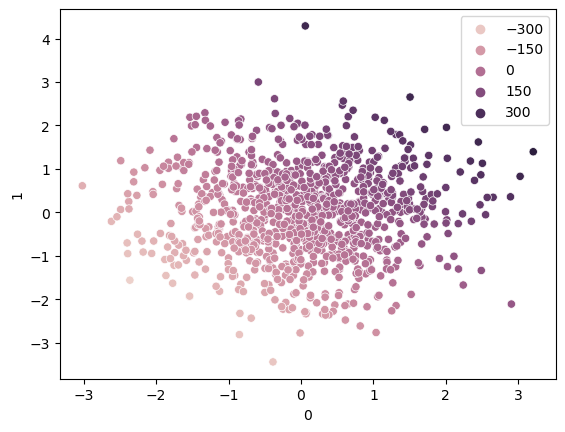

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr

SVR(kernel='linear')

In [19]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [21]:
svr.coef_

array([[88.41844847, 76.16843027]])

In [23]:
## Prediction
y_pred = svr.predict(X_test)

In [24]:
y_pred

array([ 2.64036432e+00, -1.21183735e+02, -1.38484968e+02,  2.67810924e+02,
       -7.45640736e+01, -7.88482486e+01, -2.42805005e+01, -4.47069365e+01,
       -3.96669361e+01,  6.97953788e+01, -1.97675528e+01,  1.83381700e+01,
       -9.18113926e+01,  5.05000491e+00,  1.80661817e+02, -5.03307210e+01,
        1.25650456e+02, -3.43176442e+01, -3.00729842e+01, -8.52838656e+01,
       -6.97513681e+01,  1.23720739e+02, -1.18040627e+02, -1.79017154e+02,
       -6.67912719e+01, -1.38035125e+02,  3.46609607e+01, -3.58374137e+01,
       -2.14910303e+01,  1.49567684e+02,  1.18310560e+02,  1.27685044e+02,
        1.28536609e+02, -4.91162945e+01, -9.09742540e+01,  2.41008729e+02,
        2.37268226e+01,  1.00518174e+02,  3.57861297e+01, -1.36800026e+02,
        1.29165287e+02, -1.36066586e+01, -2.68540117e+01, -7.14116917e+01,
       -1.59798100e+01,  1.44455313e+02, -8.72906268e+01,  2.04074921e+02,
        2.16783774e+01,  1.39816225e+02,  1.01945552e+01,  1.77515504e+02,
        2.10390424e+01, -

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9993745141762755

### Hyperparameter Tuning

In [28]:
# Defining parameter range
parameters = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear'],
    'epsilon' : [0.1,0.2,0.3]
}

In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVR(), param_grid=parameters, refit=True, cv=5, verbose=3)

In [30]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.658 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.634 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.639 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.632 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.658 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.627 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.634 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.639 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.632 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1000, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [33]:
y_pred = grid.predict(X_test)

In [34]:
y_pred

array([ 2.59858004e+00, -1.21783422e+02, -1.39163091e+02,  2.68963393e+02,
       -7.49540773e+01, -7.92565509e+01, -2.44436574e+01, -4.49616763e+01,
       -3.98988520e+01,  7.00565288e+01, -1.99098219e+01,  1.83668840e+01,
       -9.22786004e+01,  5.01980588e+00,  1.81422105e+02, -5.06110143e+01,
        1.26162795e+02, -3.45254846e+01, -3.02626877e+01, -8.57212956e+01,
       -7.01182305e+01,  1.24224375e+02, -1.18625813e+02, -1.79877224e+02,
       -6.71447594e+01, -1.38710181e+02,  3.47631513e+01, -3.60531200e+01,
       -2.16418963e+01,  1.50187604e+02,  1.18789636e+02,  1.28206438e+02,
        1.29062023e+02, -4.93911535e+01, -9.14380192e+01,  2.42041007e+02,
        2.37805516e+01,  1.00918208e+02,  3.58939408e+01, -1.37469209e+02,
        1.29694271e+02, -1.37222297e+01, -2.70280249e+01, -7.17869952e+01,
       -1.61053208e+01,  1.45052099e+02, -8.77374458e+01,  2.04940697e+02,
        2.17233609e+01,  1.40392164e+02,  1.01864872e+01,  1.78261064e+02,
        2.10795421e+01, -

In [35]:
r2_score(y_test, y_pred)

0.9993921241576857